# K-means from Scratch


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Some data to test

In [3]:
df = pd.read_csv('dataset_1.csv',index_col=0)
df.shape
df.head()

(1000, 2)

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561


In [6]:
# df into array X and change of the precision 
X=np.array(df)
np.set_printoptions(precision=3)
X[:5]

array([[ 0.68 , -0.016],
       [ 3.81 ,  0.798],
       [-1.661, -0.578],
       [-0.257, -0.156],
       [ 0.698,  0.175]])

## step 1 : initialize centroids

In [7]:
def InitCentroids(X,K:int):
    """
    This function initializes K centroids that are to be used in K-means on the dataset X
    It returns centroids=InitCentroids(X,K) ; a (K x n) matrix of centroid positions
    """
    # size of X : m = # examples ; n = # features
    m,n= X.shape[0], X.shape[1]
    
    # initialize the centroid array to 0
    centroids=np.zeros((K,n))
    
    # Ramdomly choose K examples from X
    centroids=X[np.random.choice(m+1, size=K, replace=False),:] 

    return centroids

### test 

In [9]:
K=2
centroids=InitCentroids(X,K)
centroids

array([[-4.657, -1.19 ],
       [ 0.405,  0.19 ]])

## Step 2 : Cluster Assignment  : Find closest centroid for each examples 

In [11]:
def FindClosestCentroids(X,centroids):
    """
    This function computes the centroid memberships for every example.
    Returns idx = FindClosestCentroids(X,centroids) ; the index of the closest centroids 
    in idx for a dataset X where each row is a single example.
    """  
    # Set  m, n and K 
    m,n= X.shape[0], X.shape[1]
    K = centroids.shape[0]
    
    # initialize idx, it will contains the index of the closest centroid for each examples
    idx=np.zeros((m,1))
    
    # loop over every examples
    for i in range(m):
        # compute the distance from the first centroids
        dist_i=np.linalg.norm(X[i,:]-centroids[0,:])
        idx[i]=0
        #compute the distance from the next centroids
        for k in range(1,K):
            dist=np.linalg.norm(X[i,:]-centroids[k,:])
            # keep the smallest distance
            if dist < dist_i:
                dist_i=dist
                idx[i]=int(k)
    # ravel returns contiguous flattened array 1D
    return idx.ravel()

### test 

In [12]:
idx=FindClosestCentroids(X,centroids)
idx[:5]

array([1., 1., 1., 1., 1.])

## Step 3 : Compute the new centroid positions

In [14]:
def ComputeCentroids(X,idx,K):
    """
    This function computes the  new  centroid  positions by computing the means of the data points
    assigned to each centroid
    returns centroids = ComputeCentroids(X,idx,K)
    """
    centroids= np.array([np.mean(X[idx==k], axis=0) for k in range(K)])
    return centroids

### test

In [15]:
ComputeCentroids(X,idx,K)

array([[-5.686,  2.636],
       [ 0.319,  0.083]])

###  Plot the progression  of the K means clustering

In [18]:
def plot_kmeans(X, idx, previous_centroids,centroids):
    random.seed(42)
    K=len(centroids)
    palette = sns.color_palette("Paired")
    K_colors=random.sample(palette,K)
    colors=[K_colors[int(l)] for l in idx]

    plt.scatter(X[:,0], X[:,1], c= colors, s=30, alpha=0.5)
    #colors= sc.get_facecolors() 
    plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], color='black', s=50, label='Previous centroids')
    plt.plot([previous_centroids[:,0],centroids[:, 0]], [previous_centroids[:,1],centroids[:, 1]], 'b-')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', s=50, label='Actual centroids')
    plt.legend()
    plt.axis("equal")

## step 4 : Run Kmean with a while  to stop when centroids don't move any more or when max_iter is reached

In [19]:
def runKmeans(X,K:int,max_iter:int, plot=True):
    """
    runs the K-means algorithm on data matrix X, where eah row of X is a single example
    [initial_centroids, centroids, idx]=runKmeans(X,K,max_iter,plot_progress)
    """
    
    #######################
    ## initialize values ##
    ######################
    m,n= X.shape[0], X.shape[1]
    initial_centroids=InitCentroids(X,K)
    
    centroids=initial_centroids
    
    previous_centroids=centroids

    tol = 1
    iter_count = 1

    
    ######################
    ##   Run Kmeans     ##
    ######################
    while not ((tol ==0 ) or  (iter_count == max_iter)) :
    
        # For each example in X, assign it to the closest centroid
        idx = FindClosestCentroids(X,centroids)
        
        # Given the memberships, compute new centroids
        centroids  = ComputeCentroids(X,idx,K)
        
        # plot 
        if plot : 
            plot_kmeans(X, idx, previous_centroids,centroids)
        
        
        # update the whiles conditions : 
        tol = np.array([b_elt - a_elt for a_elt, b_elt in zip(centroids, previous_centroids)]).sum()
        previous_centroids=centroids
        iter_count+=1

        plt.pause(0.5)
    return initial_centroids, centroids, idx
    


### test

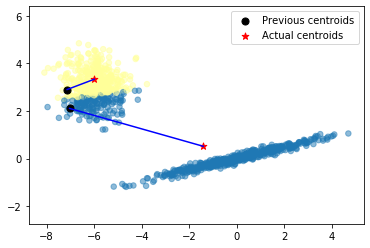

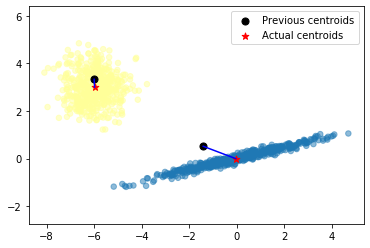

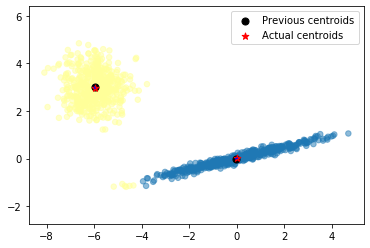

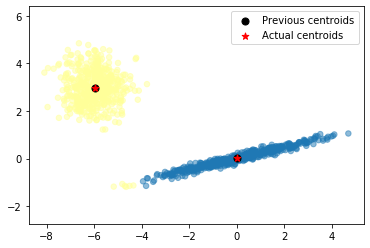

In [21]:
K=2
max_iter=10
initial_centroids, centroids, labels = runKmeans(X,K,max_iter, plot=True)